In [1]:
import geopandas as gpd

linkGit='https://github.com/Spatial-Data-Analytics-2025/Homework1/raw/refs/heads/main/'
linkWorldMaps='worldMaps.gpkg'

In [3]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')
# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


In [6]:
import pandas as pd

someDataLink='some_dataworld.csv'

someData=pd.read_csv(linkGit+someDataLink)

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       172 non-null    object 
 1   iso2          171 non-null    object 
 2   iso3          172 non-null    object 
 3   region        172 non-null    object 
 4   fragility     172 non-null    float64
 5   co2           172 non-null    int64  
 6   sq_km         172 non-null    int64  
 7   num_airports  172 non-null    int64  
 8   population    172 non-null    int64  
 9   mobiles       172 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 13.6+ KB


In [7]:
someData.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles
0,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000
1,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000
3,ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000
4,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000


In [8]:
linkToIndicators="https://github.com/Spatial-Data-Analytics-2025/Homework1/raw/refs/heads/main/worldindicators.json"
theMapAndData=gpd.read_file(linkToIndicators)
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       172 non-null    object  
 1   iso2          171 non-null    object  
 2   iso3          172 non-null    object  
 3   region        172 non-null    object  
 4   fragility     172 non-null    float64 
 5   co2           172 non-null    int64   
 6   sq_km         172 non-null    int32   
 7   num_airports  172 non-null    int32   
 8   population    172 non-null    int32   
 9   mobiles       172 non-null    int32   
 10  geometry      172 non-null    geometry
dtypes: float64(1), geometry(1), int32(4), int64(1), object(4)
memory usage: 12.2+ KB


Dot Density Map

In [10]:
theMapAndData.region.value_counts()

,count
region,
AFRICA,52
EUROPE,37
MIDDLE EAST,16
CENTRAL AMERICA AND THE CARIBBEAN,16
EAST AND SOUTHEAST ASIA,15
SOUTH AMERICA,12
SOUTH ASIA,8
AUSTRALIA AND OCEANIA,7
CENTRAL ASIA,6


<Axes: >

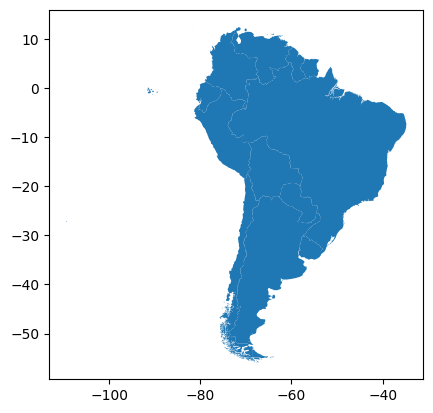

In [11]:
South_America=theMapAndData[theMapAndData.region=='SOUTH AMERICA']
South_America.plot()

In [12]:
print(South_America.population.describe().to_string(float_format=lambda x: f'{x:.0f}'))

count          12
mean     36846680
std      60107441
min        646758
25%       6498244
50%      18487318
75%      36198783
max     220051512


In [16]:
(South_America.set_index("Country").mobiles / 100000).astype(int).sort_values()

,mobiles
Country,
GUYANA,8
SURINAME,9
URUGUAY,48
PARAGUAY,86
BOLIVIA,120
ECUADOR,182
VENEZUELA,188
CHILE,267
PERU,413


In [15]:
# a copy of South America
temporal_gdf=South_America.copy()
temporal_gdf.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
7,ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
18,BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945..."
22,BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
34,CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,"MULTIPOLYGON (((-73.61806 -51.6339, -73.60494 ..."
37,COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."


In [17]:
# the row names will be the country
temporal_gdf.set_index('Country',inplace=True)

# we have this now
temporal_gdf.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
Country,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945..."
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,"MULTIPOLYGON (((-73.61806 -51.6339, -73.60494 ..."
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."


In [19]:
temporal_gdf['dots_per_country'] = (South_America['mobiles'] / 100000).astype(int).values # notice .values!

# see
temporal_gdf['dots_per_country'].head(10)

,dots_per_country
Country,
ARGENTINA,627
BOLIVIA,120
BRAZIL,2130
CHILE,267
COLOMBIA,874
ECUADOR,182
GUYANA,8
SURINAME,9
PARAGUAY,86


In [21]:
# enter 'sample_points()'
temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123).head(12)

,sampled_points
Country,
ARGENTINA,"MULTIPOINT ((-72.97688 -50.5553), (-72.57444 -..."
BOLIVIA,"MULTIPOINT ((-69.00307 -15.71523), (-68.87797 ..."
BRAZIL,"MULTIPOINT ((-73.51659 -7.45893), (-73.47689 -..."
CHILE,"MULTIPOINT ((-75.12609 -48.48531), (-75.11804 ..."
COLOMBIA,"MULTIPOINT ((-78.69498 1.37435), (-78.54284 1...."
ECUADOR,"MULTIPOINT ((-91.38028 -0.05334), (-91.26648 -..."
GUYANA,"MULTIPOINT ((-60.57363 5.78355), (-60.52443 7...."
SURINAME,"MULTIPOINT ((-57.85152 3.97306), (-57.17116 2...."
PARAGUAY,"MULTIPOINT ((-62.10509 -21.68843), (-61.84341 ..."


In [22]:
type(temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123))

geopandas.geoseries.GeoSeries

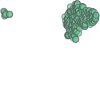

In [24]:
temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123).loc['ECUADOR']

In [25]:
South_America_dots=gpd.GeoDataFrame(geometry=temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123))
South_America_dots.head(12)

,geometry
Country,
ARGENTINA,"MULTIPOINT ((-72.97688 -50.5553), (-72.57444 -..."
BOLIVIA,"MULTIPOINT ((-69.00307 -15.71523), (-68.87797 ..."
BRAZIL,"MULTIPOINT ((-73.51659 -7.45893), (-73.47689 -..."
CHILE,"MULTIPOINT ((-75.12609 -48.48531), (-75.11804 ..."
COLOMBIA,"MULTIPOINT ((-78.69498 1.37435), (-78.54284 1...."
ECUADOR,"MULTIPOINT ((-91.38028 -0.05334), (-91.26648 -..."
GUYANA,"MULTIPOINT ((-60.57363 5.78355), (-60.52443 7...."
SURINAME,"MULTIPOINT ((-57.85152 3.97306), (-57.17116 2...."
PARAGUAY,"MULTIPOINT ((-62.10509 -21.68843), (-61.84341 ..."


In [27]:
South_America_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 12 entries, ARGENTINA to VENEZUELA
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  12 non-null     geometry
dtypes: geometry(1)
memory usage: 492.0+ bytes


In [28]:
South_America_8857=South_America.to_crs(8857)
South_America_dots_8857=South_America_dots.to_crs(8857)

<Axes: >

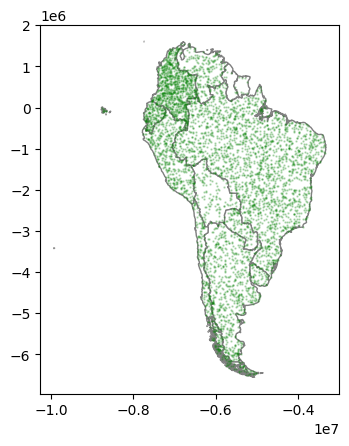

In [36]:
base=South_America_8857.plot(facecolor="white",
                              edgecolor='grey')
South_America_dots_8857.plot(markersize=0.50, color='green',ax=base, alpha=0.25)

In [37]:
South_America_dots_8857.explode()

,geometry
Country,
ARGENTINA,POINT (-5746637.526 -6041623.825)
ARGENTINA,POINT (-5761586.238 -5940832.423)
ARGENTINA,POINT (-5759753.003 -5942257.51)
ARGENTINA,POINT (-5806608.055 -5825522.106)
ARGENTINA,POINT (-5700009.892 -6035828.779)
...,...
VENEZUELA,POINT (-5856317.141 1054500.556)
VENEZUELA,POINT (-5847050.412 839135.817)
VENEZUELA,POINT (-5840656.735 857872.281)


In [38]:
South_America_dots_8857.explode(ignore_index=True)

,geometry
0,POINT (-5746637.526 -6041623.825)
1,POINT (-5761586.238 -5940832.423)
2,POINT (-5759753.003 -5942257.51)
3,POINT (-5806608.055 -5825522.106)
4,POINT (-5700009.892 -6035828.779)
...,...
4947,POINT (-5856317.141 1054500.556)
4948,POINT (-5847050.412 839135.817)
4949,POINT (-5840656.735 857872.281)
4950,POINT (-5805547.67 1084887.244)


In [39]:
type(South_America_dots_8857.explode(ignore_index=True))

geopandas.geodataframe.GeoDataFrame

In [41]:
South_America_dots_8857=South_America_dots_8857.explode(ignore_index=True)

Proportional Symbol Map